# Task 2 NER 

In [12]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from langdetect import detect
import seaborn as sns

data = load_dataset('argilla/medical-domain')['train']
df = data.to_pandas()

df['label'] = df.prediction.apply(lambda x: x[0]['label'])



df['language'] = df['text'].apply(lambda x: detect(x))
unique_languages = df['language'].unique()

english_texts = df[df['language'] == 'en']

df['text'].head()

0    PREOPERATIVE DIAGNOSIS:,  Iron deficiency anem...
1    CLINICAL INDICATION:  ,Normal stress test.,PRO...
2    FINDINGS:,Axial scans were performed from L1 t...
3    PREOPERATIVE DIAGNOSIS: , Blood loss anemia.,P...
4    REASON FOR VISIT:  ,Elevated PSA with nocturia...
Name: text, dtype: object

In [9]:
print(english_texts['text'].sample(5).to_string(index=False))

PREOPERATIVE DIAGNOSES:,1.  Nasal obstruction s...
PROCEDURES PERFORMED: , Phenol neurolysis right...
PREOPERATIVE DIAGNOSIS (ES):, Recurrent herniat...
PREOPERATIVE DIAGNOSIS: , Subcapital left hip f...
PREOPERATIVE DIAGNOSES,1.  Bowel obstruction.,2...


In [10]:
import spacy

nlp = spacy.load("en_core_web_sm")

def get_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

df_sample = df.sample(100)
df_sample['entities'] = df_sample['text'].apply(get_entities)

print(df_sample[['text', 'entities']].head())

                                                   text  \
2229  PREOPERATIVE DIAGNOSIS: , Carious teeth and pe...   
2373  PREOPERATIVE DIAGNOSIS: , Lipodystrophy of the...   
313   EXAM: , Transesophageal echocardiogram and dir...   
4399  SUBJECTIVE:,  The patient returns to the Pulmo...   
911   PROCEDURE: , Primary right shoulder arthroscop...   

                                               entities  
2229  [(Carious, NORP), (Carious, NORP), (32.,PROCED...  
2373  [(anesthesia, GPE), (15, MONEY), (1000, CARDIN...  
313   [(Transesophageal, PERSON), (1, CARDINAL), (At...  
4399  [(the Pulmonary Medicine Clinic, ORG), (COPD, ...  
911   [(Primary, PERSON), (42-year-old, DATE), (5 - ...  


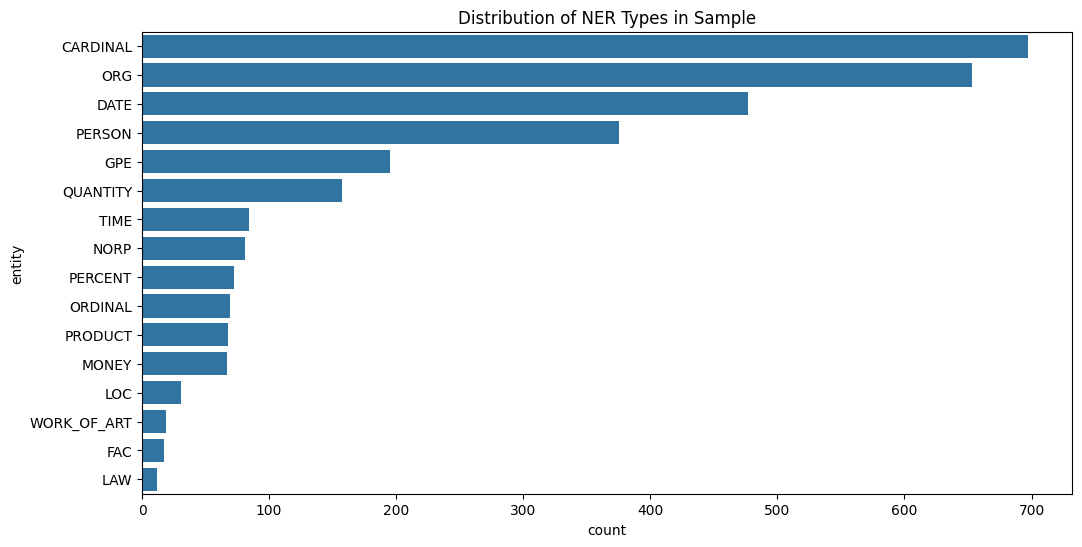

In [11]:
all_entities = [ent[1] for sublist in df_sample['entities'].tolist() for ent in sublist]


entity_df = pd.DataFrame(all_entities, columns=['entity'])


plt.figure(figsize=(12, 6))
sns.countplot(y='entity', data=entity_df, order=entity_df['entity'].value_counts().index)
plt.title('Distribution of NER Types in Sample')
plt.show()